# Machine Learning Section

__Section desctiption.......__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from modules.preprocess import PreprocessAPA

In [2]:
full_ml = pd.read_csv("/Users/ibragimzhussup/Desktop/APA_Lab/src/data/full_text.csv")
prep_ml = pd.read_csv("/Users/ibragimzhussup/Desktop/APA_Lab/src/data/preprocessed_text.csv")

### Fully Preprcoessed Text

**This section runs all ML models on fully preprocessed text**

In [3]:
from modules.ML_models import ML_Models
ml_modeling = ML_Models()
preproc = PreprocessAPA()
train, test, val = preproc.split_data(prep_ml, test_val=True, n_samples_train=500, test_split_ratio=0.5)
train[['labels', 'label_ids']].drop_duplicates().sort_values(by='label_ids')

,labels,label_ids
353,interview,0
905,NONRELEVANT,1
1333,letter,2
1860,comment,3


In [4]:
preprocessed_df_performance = ml_modeling.run(train, test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.06      0.88      0.11       572
           1       1.00      0.78      0.88     84310
           2       0.20      0.68      0.31      2006
           3       0.06      0.96      0.10       307

    accuracy                           0.78     87195
   macro avg       0.33      0.83      0.35     87195
weighted avg       0.97      0.78      0.86     87195


Random Forest
              precision    recall  f1-score   support

           0       0.07      0.91      0.14       572
           1       0.99      0.77      0.87     84310
           2       0.15      0.68      0.24      2006
           3       0.05      0.95      0.10       307

    accuracy                           0.77     87195
   macro avg       0.32      0.83      0.34     87195
weighted avg       0.96      0.77      0.85     87195


Naive Bayes
              precision    recall  f1-score   support

           0       0.01    

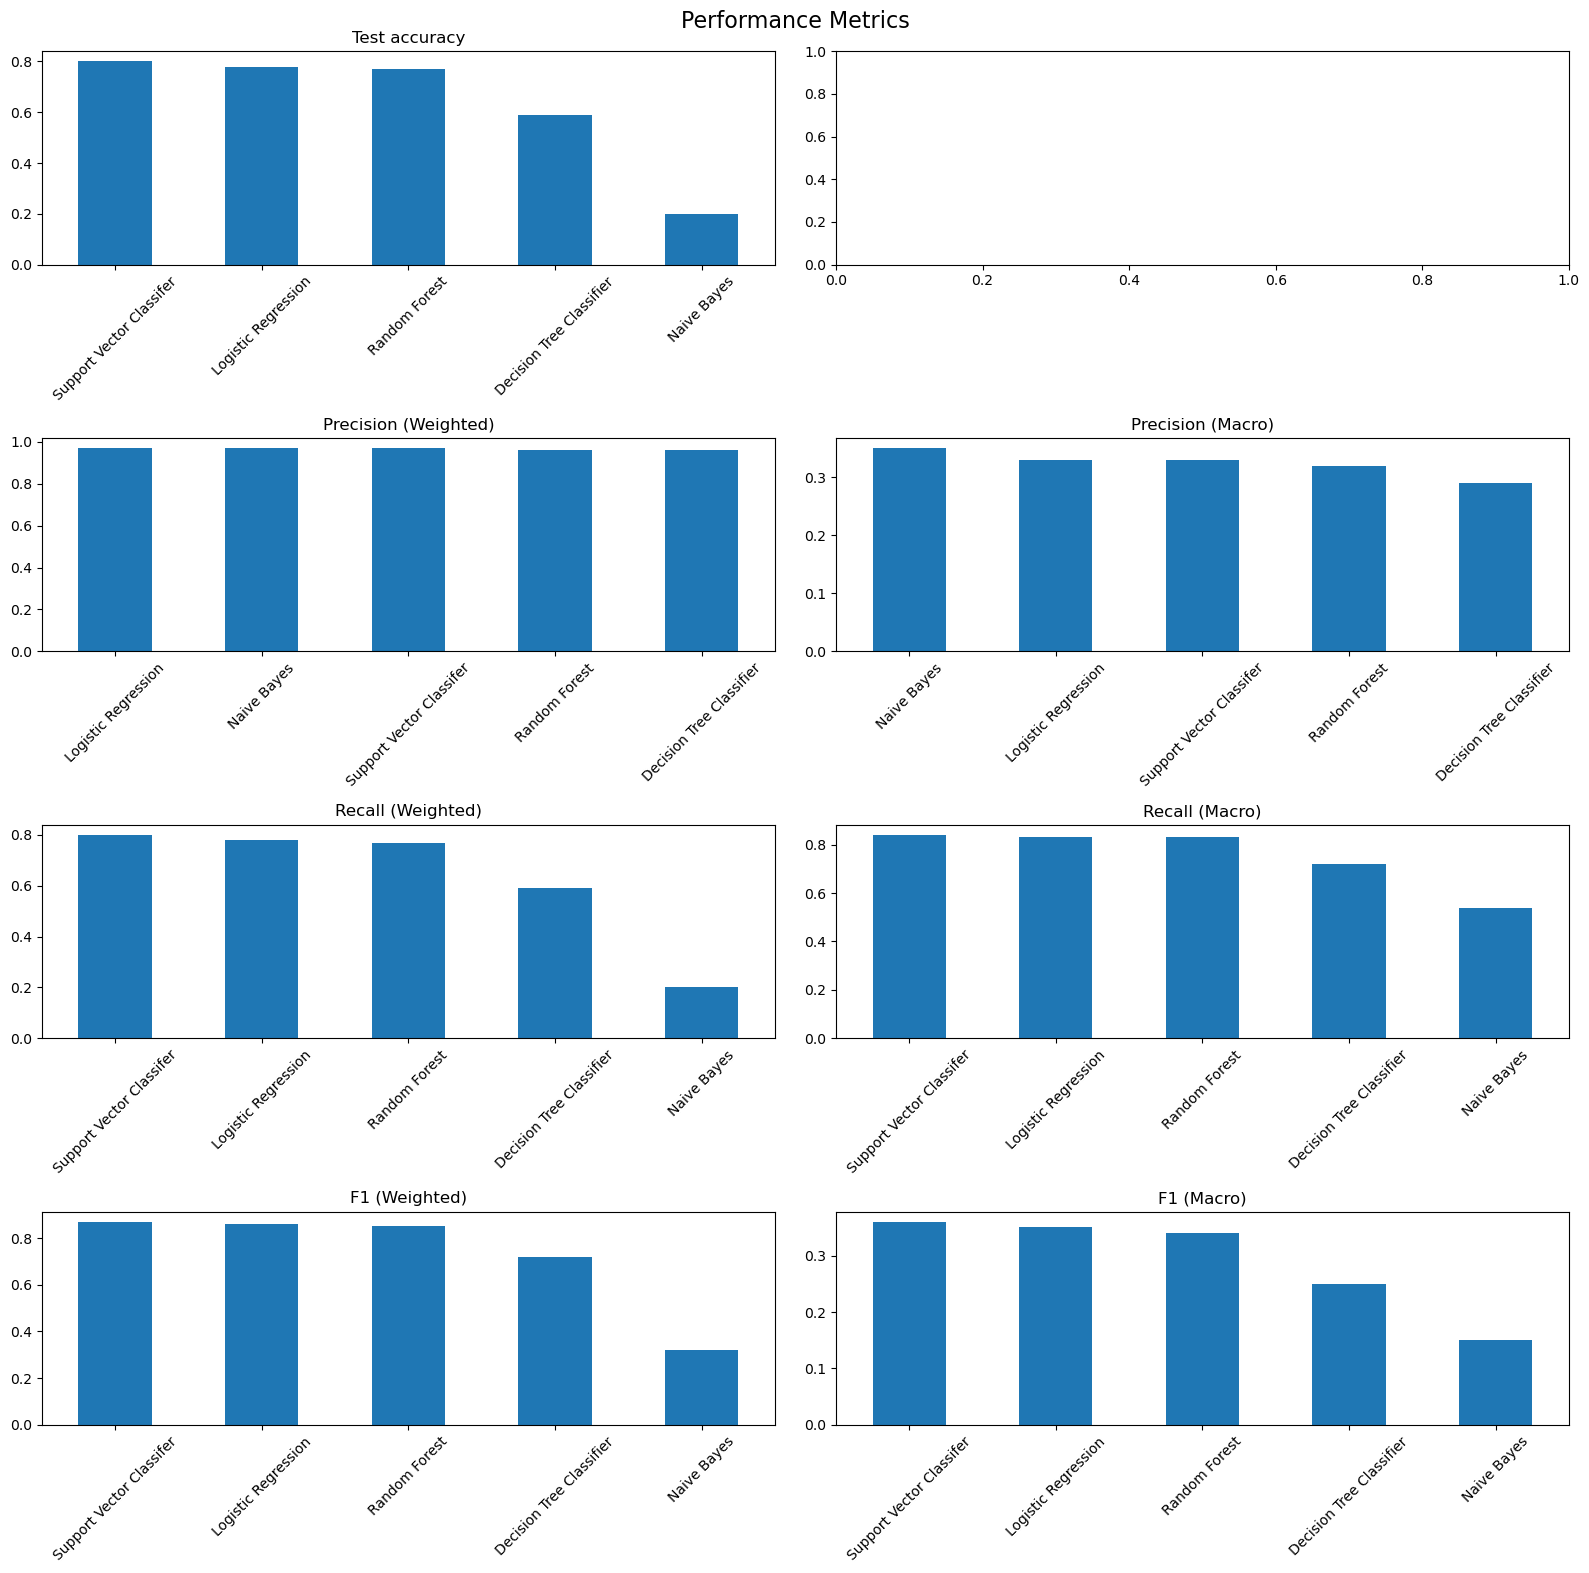

In [5]:
ml_modeling.plot_performance(preprocessed_df_performance, average_val="both")
plt.show()

**Top 2 models by:**

- Accuracy:
    - SVC
    - Logistic Regression
- Precision:
    - Naive Bayes
    - Logistic Regression
- Recall:
    - SVC (weigted only)
    - Logistic Regression (both)
    - Random Forest (macro only)
- F1:
    - SVC
    - Logistic Regression

**Logistic Regression is (one of) top performing model across all metrics**

**Now we'll check the same but on full text and compare if the performance increases or decreases**

### Full Text

In [6]:
train_full, test_full, val_full = preproc.split_data(full_ml, test_val=True, n_samples_train=500, test_split_ratio = 0.5)
train_full[['labels', 'label_ids']].drop_duplicates().sort_values(by='label_ids')

,labels,label_ids
353,interview,0
905,NONRELEVANT,1
1333,letter,2
1860,comment,3


In [7]:
full_ml_modeling = ML_Models()
full_df_performance = full_ml_modeling.run(train_full, test_full)

Logistic Regression
              precision    recall  f1-score   support

           0       0.09      0.91      0.16       560
           1       0.99      0.75      0.85     84254
           2       0.21      0.64      0.32      2074
           3       0.02      0.96      0.05       307

    accuracy                           0.75     87195
   macro avg       0.33      0.82      0.35     87195
weighted avg       0.97      0.75      0.83     87195


Random Forest
              precision    recall  f1-score   support

           0       0.10      0.92      0.18       560
           1       0.99      0.64      0.78     84254
           2       0.12      0.69      0.20      2074
           3       0.02      0.96      0.04       307

    accuracy                           0.64     87195
   macro avg       0.31      0.81      0.30     87195
weighted avg       0.96      0.64      0.76     87195


Naive Bayes
              precision    recall  f1-score   support

           0       0.01    

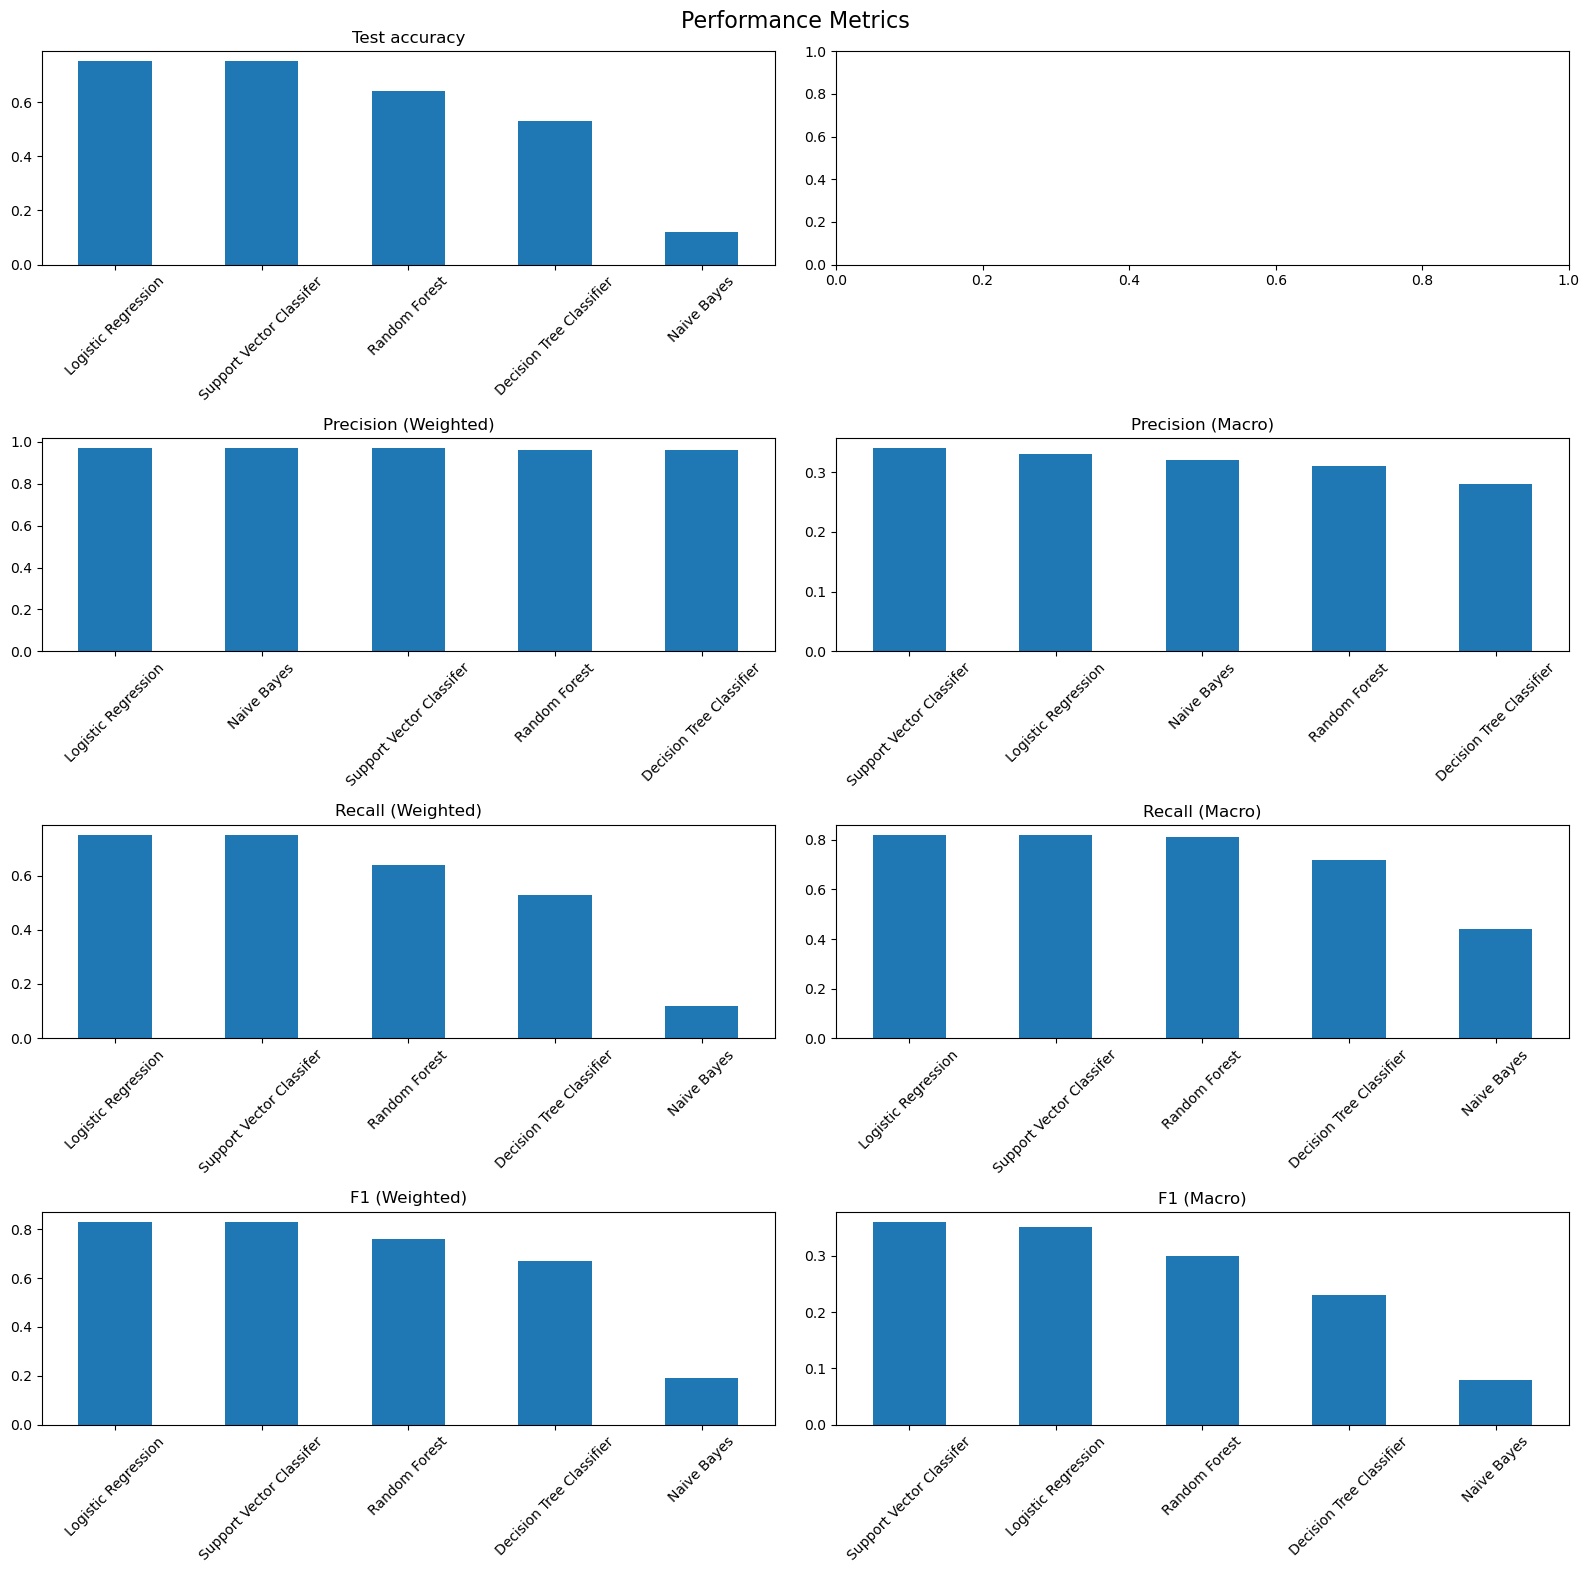

In [8]:
full_ml_modeling.plot_performance(full_df_performance, average_val="both")
plt.show()

**The results are basically the same**

**We will finetune SVC and Logistic Regression because they appear as top models in most of the metrics**

**Now the question remains, whether to train on full text or preprocessed text**

**At the first sight it appears that there's no significant difference between fully preprocessed and full text. We will therefore fine tune our models on both datasets to then decide which dataset to keep (also for other sections).**

## Fine Tuning

In [9]:
lr_bestparams = ml_modeling.fine_tune("logreg", use_all_CPUs=True, number_of_iterations=50, num_cv=5)
svc_bestparams = ml_modeling.fine_tune("svc", use_all_CPUs=True, number_of_iterations=10, num_cv=5)

lr_bestparams_full_text = full_ml_modeling.fine_tune("logreg", use_all_CPUs=True, number_of_iterations=50, num_cv=5)
svc_bestparams_full_text = full_ml_modeling.fine_tune("svc", use_all_CPUs=True, number_of_iterations=10, num_cv=5)

/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 79.23526217687179, 'max_iter': 637, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Score for Logistic Regression: 0.7870000000000001
Total runtime: 0:01:34
Best Parameters for SVC: {'C': 1.2686679007539894, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score for SVC: 0.7710000000000001
Total runtime: 0:01:11


/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ibragimzhussup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 79.23526217687179, 'max_iter': 637, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Score for Logistic Regression: 0.8115
Total runtime: 0:02:34
Best Parameters for SVC: {'C': 1.2686679007539894, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score for SVC: 0.7869999999999999
Total runtime: 0:01:46


#### Logistic Regression

In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
X_train, y_train = train['text'], train['label_ids']
X_test, y_test = test['text'], test['label_ids']
X_val, y_val = val['text'], val['label_ids']

X_train_full, y_train_full = train_full['text'], train_full['label_ids']
X_test_full, y_test_full = test_full['text'], test_full['label_ids']
X_val_full, y_val_full = val_full['text'], val_full['label_ids']

vect = TfidfVectorizer()

X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)
X_val_vect = vect.transform(X_val)

vect_full = TfidfVectorizer()

X_train_full_vect = vect_full.fit_transform(X_train_full)
X_test_full_vect = vect_full.transform(X_test_full)
X_val_full_vect = vect_full.transform(X_val_full)

In [16]:
lr = LogisticRegression(**lr_bestparams)
lr_full = LogisticRegression(**lr_bestparams_full_text)

lr.fit(X_train_vect, y_train)
lr_full.fit(X_train_full_vect, y_train_full)

print("Logistic Regression")
print("Test set")
print("Preprocessed Text")
print(classification_report(y_test, lr.predict(X_test_vect)))
print("Full Text")
print(classification_report(y_test_full, lr_full.predict(X_test_full_vect)))

Logistic Regression
Test set
Preprocessed Text
              precision    recall  f1-score   support

           0       0.06      0.90      0.12       572
           1       1.00      0.77      0.87     84310
           2       0.18      0.71      0.28      2006
           3       0.05      0.96      0.10       307

    accuracy                           0.77     87195
   macro avg       0.32      0.84      0.34     87195
weighted avg       0.97      0.77      0.85     87195

Full Text
              precision    recall  f1-score   support

           0       0.09      0.94      0.16       560
           1       1.00      0.76      0.86     84254
           2       0.19      0.70      0.30      2074
           3       0.03      0.97      0.06       307

    accuracy                           0.76     87195
   macro avg       0.33      0.84      0.35     87195
weighted avg       0.97      0.76      0.84     87195



In [17]:
print("Validation set")
print("Preprocessed Text")
print(classification_report(y_val, lr.predict(X_val_vect)))
print("Full Text")
print(classification_report(y_val_full, lr_full.predict(X_val_full_vect)))

Validation set
Preprocessed Text
              precision    recall  f1-score   support

           0       0.05      0.91      0.10       496
           1       1.00      0.77      0.87     84334
           2       0.18      0.70      0.29      2044
           3       0.05      0.95      0.10       322

    accuracy                           0.77     87196
   macro avg       0.32      0.83      0.34     87196
weighted avg       0.97      0.77      0.85     87196

Full Text
              precision    recall  f1-score   support

           0       0.08      0.92      0.15       508
           1       1.00      0.76      0.86     84390
           2       0.19      0.71      0.30      1976
           3       0.03      0.98      0.07       322

    accuracy                           0.76     87196
   macro avg       0.32      0.84      0.34     87196
weighted avg       0.97      0.76      0.84     87196



#### SVC

In [19]:
svc = SVC(**svc_bestparams)
svc_full = SVC(**svc_bestparams_full_text)

svc.fit(X_train_vect, y_train)
svc_full.fit(X_train_full_vect, y_train_full)

print("Support Vector Classifier")
print("Test set")
print("Preprocessed Text")
print(classification_report(y_test, svc.predict(X_test_vect)))
print("Full Text")
print(classification_report(y_test_full, svc_full.predict(X_test_full_vect)))

Support Vector Classifier
Test set
Preprocessed Text
              precision    recall  f1-score   support

           0       0.07      0.90      0.14       572
           1       1.00      0.79      0.88     84310
           2       0.19      0.71      0.30      2006
           3       0.05      0.96      0.09       307

    accuracy                           0.79     87195
   macro avg       0.33      0.84      0.35     87195
weighted avg       0.97      0.79      0.86     87195

Full Text
              precision    recall  f1-score   support

           0       0.11      0.94      0.20       560
           1       0.99      0.75      0.85     84254
           2       0.22      0.64      0.33      2074
           3       0.02      0.98      0.04       307

    accuracy                           0.75     87195
   macro avg       0.34      0.83      0.36     87195
weighted avg       0.97      0.75      0.83     87195



**The one thing to notice is that SVC took approx. 3 minutes to predict! This is enormous amount of time compared Logistic Regression. We will therefore continue with Logistic Regression because:**

- Prediction time is 0.15 seconds. SVC has approx. 3 minutes.
- The values do not differ significantly, Logistic Regression simetimes has better results.
- The values do not differ significantly between test and validation sets.

Our coaches from WU recommended to use binary classification for the Machine Learning models. In the next steps we will test the performance of the binary Logistic Regression and compare it to the Logistic Regression that we already have. If the results are significantly better, we can go further with development of other models.

#### Binary Logistic Regression

In [39]:
classifiers = {}


for label in [0, 1, 2, 3]:
    clf = LogisticRegression()
    y_train_binary = (y_train == label).astype(int)
    clf.fit(X_train_vect, y_train_binary)
    classifiers[label] = clf

In [46]:
predictions_proba = {}

for label, clf in classifiers.items():
    predictions_proba[label] = clf.predict_proba(X_test_vect)[:, 1]

predictions_proba_val = {}

for label, clf in classifiers.items():
    predictions_proba_val[label] = clf.predict_proba(X_val_vect)[:, 1]

In [47]:
combined_predictions = np.argmax(np.array(list(predictions_proba.values())), axis=0)
print(classification_report(y_test, combined_predictions))

combined_predictions_val = np.argmax(np.array(list(predictions_proba_val.values())), axis=0)
print(classification_report(y_val, combined_predictions_val))

              precision    recall  f1-score   support

           0       0.05      0.88      0.10       572
           1       0.99      0.79      0.88     84310
           2       0.22      0.65      0.33      2006
           3       0.06      0.95      0.11       307

    accuracy                           0.79     87195
   macro avg       0.33      0.82      0.36     87195
weighted avg       0.97      0.79      0.86     87195

              precision    recall  f1-score   support

           0       0.05      0.91      0.09       496
           1       1.00      0.79      0.88     84334
           2       0.22      0.65      0.33      2044
           3       0.06      0.95      0.12       322

    accuracy                           0.79     87196
   macro avg       0.33      0.83      0.35     87196
weighted avg       0.97      0.79      0.86     87196



**The result's don't differ that much**

**Now about the question: do we need to keep the preprocessed text or the full text?**

It appears that it really doesn't matter for the ML models whether if we use full or preprocessed text. Therefore in the ML section we will use preprocessed text, as it reduces the computational time. For the DL section in the other hand, we may keep the full text as it might be cruical for the Embeddings to have the full text. The same for LLM section. We will therefore continue with the full text dataframe.

Finally the best model in the Machine Learning section is **Logistic Regression**

We can also play around with highly interpretable models such decision trees, to see which words mostly affect the predictions. But more on that later.